# Project: Wrangling and Analyze Data

In [63]:
#importing Up all libraries 

import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from bs4 import BeautifulSoup as soup
import json

## Data Gathering
Gathering **all** three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [64]:
#importing the twitter archive to a data frame
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [65]:
#Downloading the image predictions file for the image
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', 'wb') as f:
    f.write(response.content)

In [66]:
# read the downloaded file as a pandas dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [67]:
#loading the additional tweets data into pandas 
with open('tweet-json.txt') as f:
    add_tweets = pd.read_json(f, lines= True, encoding = 'utf-8')

In [68]:
#viewing the data 
add_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, I'll detect and document at least **eight (8) quality issues and two (2) tidiness issue** using   both visual assessment and programmatic assessement to assess the data.


## Archive data set

### Visual Assesment

In [69]:
#viewing the data set
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


The source column has urls instead of just the source.

In [70]:
#Taking a random sample from the data set
tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1668,682638830361513985,NaN,NaN,2015-12-31 19:05:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have no words. Just a magnificent pup. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682638830...,12,10,None,None,None,None,None
2175,669214165781868544,NaN,NaN,2015-11-24 18:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jaspers. He is a northeastern Gillette...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669214165...,10,10,Jaspers,None,None,None,None
851,765669560888528897,NaN,NaN,2016-08-16 22:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tove. She's a Balsamic Poinsetter. Sur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765669560...,12,10,Tove,None,None,None,None
256,843981021012017153,NaN,NaN,2017-03-21 00:22:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS DOING A SNOOZE NO SHAME IN A SNOOZE 13/...,NaN,NaN,NaN,https://twitter.com/brianstack153/status/79679...,13,10,None,None,None,None,None
669,790227638568808452,NaN,NaN,2016-10-23 16:25:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leela. She's a Fetty Wo...,7.626999e+17,4.196984e+09,2016-08-08 17:19:51 +0000,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,None,None,None,None
702,786036967502913536,NaN,NaN,2016-10-12 02:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Scout. He really wants ...,7.798343e+17,4.196984e+09,2016-09-25 00:06:08 +0000,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,None,None,None,None
1366,702671118226825216,NaN,NaN,2016-02-25 01:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rambo &amp; Kiwi. Rambo's the pup with th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702671118...,10,10,Rambo,None,None,None,None
658,791672322847637504,NaN,NaN,2016-10-27 16:06:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When she says you're a good boy and you know y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
419,822244816520155136,NaN,NaN,2017-01-20 00:50:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send pics of m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822244816...,11,10,None,None,None,None,None
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None


### Programatic Assement 

In [71]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The data set has 2356 rows and 17 columns with some null values in some columns 

From the info code we can see that `tweet_id`  has the wrong data type (int64 vs object) and 
`timestamp` has the wrong data type (object vs datetime).

In [72]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [73]:
# Checking for the number of tweets that are replies
tweet_archive['in_reply_to_status_id'].notnull().sum()

78

In [74]:
# Checking for the number of tweets that are retweets
tweet_archive['retweeted_status_id'].notnull().sum()

181

In [75]:
#checking for duplicates
tweet_archive.duplicated().any()

False

78 rows are replies while 181 rows are retweets. These roles will be deleted. There are no duplicate rows 

In [76]:
# Assesing the dog names columns in the dat set for eronuos names
set(tweet_archive.name.values.tolist())

{'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


The eronous dog names are towards the end of the list and they are all in lower case. They will be removed and none replaced with something more descriptive

#### Tweet Archive issues 

##### Quality issues 

- `tweet_id`  has the wrong data type (int64 vs object).
- `timestamp` has the wrong data type (object vs datetime).
- Strange and unfamiliar pet names in the name column
- 181 records are retweets and wouldn't be needed
- 78 records are replies and wouldn't be needed. 
- The source column has urls instead of just the source. 
- Replace 'none' names with something more descriptive 

##### Tidiness issues
- The dog stage `doggo`, `floofer`, `pupper`, `puppo` needs to be combined into 1 column.

- We don't need `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, and `in_reply_to_user_id` colunms since the relevant data is in the additional data file.

## Image prediction Dataset 

### Visual Assesment

In [77]:
#viewing the data set
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [78]:
#taking a random sample 
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
351,672523490734551040,https://pbs.twimg.com/media/CVVIjGbWwAAxkN0.jpg,1,golden_retriever,0.565981,True,chow,0.081212,True,Irish_terrier,0.061596,True
659,682393905736888321,https://pbs.twimg.com/media/CXhZom1UwAA4Zz6.jpg,1,vizsla,0.657275,True,paddle,0.090286,False,Rhodesian_ridgeback,0.048228,True
1933,859607811541651456,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False
858,696886256886657024,https://pbs.twimg.com/media/CavWWdFWAAArflW.jpg,1,kuvasz,0.383941,True,golden_retriever,0.289085,True,dingo,0.056548,False
1541,791026214425268224,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
1283,750429297815552001,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,0.029409,False
1900,851464819735769094,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,2,web_site,0.919649,False,menu,0.026306,False,crossword_puzzle,0.003482,False
1884,847606175596138505,https://pbs.twimg.com/media/C8NNUDBUMAE0XxJ.jpg,1,Cardigan,0.413688,True,Boston_bull,0.381836,True,doormat,0.065868,False


### Programatic Assesment

In [79]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [80]:
image_predictions.shape

(2075, 12)

In [81]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


This data set has 2075 rows and 17 columns with no null values 

In [82]:
#viewing the values in the P1 column 
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [83]:
#checking for duplicates 
image_predictions.duplicated().any()

False

#### Image Prediction issues 

##### Quality issues 

- `tweet_id` has the wrong data type (int64 vs object).


##### Tidiness issues

- We only need the column with the highest probability as oposed to `p1`, `p2`, and `p3`.
- There are records where the image the model predicts are not dogs
- Some columns are not needed for the analysis`img_num`
- We only need 3 columns `id`, `retweet_count`, `favorite_count`.

## Additional Dataset

### Visual Assesment

In [84]:
#viewing the data set
add_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [85]:
#Taking a random sample from the dataset 
add_tweets.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
526,2016-12-13 18:01:07+00:00,808733504066486276,808733504066486272,Here's a pupper in a onesie. Quite pupset abou...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 808733489898004481, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8784,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1996,2015-12-03 22:09:14+00:00,672538107540070400,672538107540070400,Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672538101307318273, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1089,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1048,2016-06-15 22:36:19+00:00,743210557239623680,743210557239623680,"Meet Kayla, an underground poker legend. Playe...",False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 743210550650376192, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4215,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
837,2016-08-21 02:47:37+00:00,767191397493538821,767191397493538816,I don't know any of the backstory behind this ...,False,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 767191392800108546, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,13643,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2007,2015-12-03 03:21:00+00:00,672254177670729728,672254177670729728,This is Rolf. He's having the time of his life...,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672254170599157760, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1515,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1681,2015-12-29 04:31:49+00:00,681694085539872773,681694085539872768,This is Bo. He's a Benedoop Cumbersnatch. Seem...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 681694081152516096, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,14010,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
805,2016-09-03 16:04:27+00:00,772102971039580160,772102971039580160,This is Penny. She's an OU cheerleader. About ...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 772102964165111808, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4448,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
494,2016-12-26 00:00:03+00:00,813172488309972993,813172488309972992,This is Eleanor. She winks like she knows many...,False,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 813172481494134784, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,10384,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
952,2016-07-09 15:02:31+00:00,751793661361422336,751793661361422336,This is Fred. He's having one heck of a summer...,False,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,6479,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
830,2016-08-24 23:50:10+00:00,768596291618299904,768596291618299904,Say hello to Oakley and Charlie. They're convi...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 768596278481657856, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5592,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Programatic Assesment

In [86]:
add_tweets.shape

(2354, 31)

In [87]:
add_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

This data set has 2354 rows and 31 columns which is wider that the data set reterived above 

#### Additional tweet data issues

##### Quality issues 

- `id_str` has the wrong data type (int64 vs object).

##### Tidiness issues
- We only need 3 columns `id_str`, `retweet_count`, `favorite_count`.
- Information is repeated across multiple tables
- `id_str` needs to be changed to `tweet_id` so the 3 tables can be merged using it as key.

## Issues Summary

### Quality issues
#### Tweet Archive

1. `tweet_id`  has the wrong data type (int64 vs object).
2. `timestamp` has the wrong data type (object vs datetime).
3. Strange and unfamiliar pet names in the name column
4. 181 records are retweets and wouldn't be needed
5. 78 records are replies and wouldn't be needed.
6. The source column has urls instead of just the source. 

#### Image Predictions

7. `tweet_id` has the wrong data type (int64 vs object).


#### Additional Tweet Data

8. `id_str` has the wrong data type (int64 vs object).

### Tidiness issues

#### Tweet Archive:

1. The dog stage `doggo`, `floofer`, `pupper`, `puppo` needs to be combined into 1 column.

2. We don't need `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, and `in_reply_to_user_id` colunms since the relevant data is in the additional data file.

#### Image Predictions

3. We only need the column with the highest probability as oposed to `p1`, `p2`, and `p3`.
4. There are records where the image the model predicts are not dogs
5. Some columns are not needed for the analysis like `img_num`

#### Additional Tweet Data

6. `id_str` needs to be changed to `tweet_id` so the 3 tables can be merged using it as key.
7. We only need 3 columns `id_str`, `retweet_count`, `favorite_count`.
8. Information is repeated across multiple tables

## Cleaning Data
In this section, I wil clean **all** of the issues i documented while assessing. 

In [88]:
# Make copies of original pieces of data
tweet_archive_copy = tweet_archive.copy()
image_predictions_copy = image_predictions.copy()
add_tweets_copy = add_tweets.copy()

### Tweet_Archive Data

#### Issue #1: - The source column has urls with the source at the end instead of just the source.

#### Define: 
Extract tweet source from url by splitting 

##### Code

In [89]:
# Splitting the  the content of the `source` column to get the string
tweet_archive_copy['source'] = tweet_archive_copy['source'].apply(lambda x:((x.split('>')[1]).split('<')[0]))

##### Test

In [90]:
#Testing for changes 
tweet_archive_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Issue #2: `timestamp` has the wrong data type (object vs datetime).


##### Define
Convert data type to datetime


##### Code

In [92]:
#viewing the data types 
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [93]:
#converting the timestamp column to datetime64
tweet_archive_copy['timestamp'] = tweet_archive_copy['timestamp'].astype('datetime64')

##### Test

In [94]:
#testing for changes to the timestamp data type
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [95]:
tweet_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Issue #3: - The dog stage `doggo`, `floofer`, `pupper`, `puppo` needs to be combined into 1 column.


##### Define
- Replace all the None values with an empty string  
- Create an array for the columns that needs to be joined 
- join the 4 columns to form dog_stage
- drop the 4 idle columns 
- Replace the empty string with NaN

##### Code

In [96]:
# Defining the columns to be joined
dog_stages = ['doggo','floofer','pupper','puppo']

# Replacing all None values in the columns with an empty string
tweet_archive_copy[dog_stages] = tweet_archive_copy[dog_stages].replace('None', '', regex=True)

# Joining the 4 columns to create the dog_stage column
tweet_archive_copy['dog_stage'] = tweet_archive_copy[dog_stages].apply(lambda x: ''.join(x.dropna().astype(str)), axis=1)

# Droping the 4 original columns
tweet_archive_copy.drop(columns=dog_stages, inplace=True)

In [97]:
#replacing the empty string with NaN
tweet_archive_copy.dog_stage.replace('', np.nan, inplace=True)

In [98]:
#adjusting for dogs with two stages and converting to the first string
tweet_archive_copy.loc[tweet_archive_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo' 
tweet_archive_copy.loc[tweet_archive_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo' 
tweet_archive_copy.loc[tweet_archive_copy.dog_stage == 'doggofloofer','dog_stage'] = 'doggo'


##### Test

In [99]:
#Taking a random sample of the data set to test
tweet_archive_copy.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
697,786595970293370880,NaN,NaN,2016-10-13 15:54:28,Twitter for iPhone,This is Dale. He's a real spookster. Did me qu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786595970...,11,10,Dale,NaN
780,775733305207554048,NaN,NaN,2016-09-13 16:30:07,Twitter for iPhone,This is Anakin. He strives to reach his full d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775733305...,11,10,Anakin,doggo
1861,675483430902214656,NaN,NaN,2015-12-12 01:12:54,Twitter for iPhone,Rare shielded battle dog here. Very happy abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675483430...,5,10,None,NaN
991,748699167502000129,NaN,NaN,2016-07-01 02:06:06,Twitter for iPhone,Meet Tripp. He's being eaten by a sherk and do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748699167...,11,10,Tripp,NaN
1568,687818504314159109,NaN,NaN,2016-01-15 02:08:05,Twitter for iPhone,With great pupper comes great responsibility. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687818504...,12,10,None,pupper
447,819015331746349057,NaN,NaN,2017-01-11 02:57:26,Twitter for iPhone,RT @dog_rates: This is Sunny. She was also a v...,8.190064e+17,4.196984e+09,2017-01-11 02:21:57 +0000,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo
372,828381636999917570,NaN,NaN,2017-02-05 23:15:47,Twitter for iPhone,Meet Doobert. He's a deaf doggo. Didn't stop h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828381636...,14,10,Doobert,doggo
2064,671154572044468225,NaN,NaN,2015-11-30 02:31:34,Twitter for iPhone,Meet Holly. She's trying to teach small human-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671154572...,11,10,Holly,NaN
258,843604394117681152,NaN,NaN,2017-03-19 23:25:35,Twitter for iPhone,This is Hank. He's been outside for 3 minutes ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843604394...,11,10,Hank,NaN
570,801854953262350336,8.018543e+17,11856342.0,2016-11-24 18:28:13,Twitter for iPhone,.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE...,NaN,NaN,NaN,NaN,11,10,None,NaN


In [100]:
# Checking for dog_stage value counts 
tweet_archive_copy.dog_stage.value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: dog_stage, dtype: int64

The result is returned as expected 

#### Issue #4:  181 records are retweets and wouldn't be needed

##### Define
Drop rows that are retweets (retweeted_status_id is not null)


##### Code

In [101]:
# removing the records that are retweets 
tweet_archive_copy= tweet_archive_copy[tweet_archive_copy.retweeted_status_id.isnull()] 

##### Test

In [102]:
#checking the shape of the data set 
tweet_archive_copy.shape

(2175, 14)

#### Issue #5: 78 records are replies and wouldn't be needed.

##### Define
Drop rows that are replies (in_reply_to_status_id is not null)


##### Code

In [103]:
#removing the records that are replies
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy.in_reply_to_status_id.isnull()]

##### Test

In [104]:
#checking the shape of the data set 
tweet_archive_copy.shape

(2097, 14)

#### Issue #6:  `tweet_id`  has the wrong data type (int64 vs object).

##### Define
change data type on tweet_id to str

##### Code

In [105]:
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

In [106]:
#changing the data type on tweet_id to object 
tweet_archive_copy['tweet_id'] = tweet_archive_copy['tweet_id'].astype('object')

#### Test

In [107]:
#Checking to see that data type 
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

#### Issue #7: Strange and unfamiliar pet names in the name column

##### Define
change all unfamiliar dog names in lower case to NaN

##### Code

In [108]:
# Identifying non dog names in the name column
set(tweet_archive_copy.name.values.tolist())

{'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [109]:
# creating an array of non dog names in the name column
non_dogs= tweet_archive_copy[tweet_archive_copy['name'].str.islower()==True].index

In [110]:
non_dogs

Int64Index([  22,   56,  169,  193,  335,  369,  542,  649,  801,  819,
            ...
            2335, 2345, 2346, 2347, 2348, 2349, 2350, 2352, 2353, 2354],
           dtype='int64', length=104)

In [111]:
#replacing non dog names with NaN
tweet_archive_copy.loc[non_dogs, 'name'] = np.nan

In [112]:
#getting index of rows where name is a single letter 
tweet_archive_copy[tweet_archive_copy['name'].str.len()<=1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,NaN


The real name can be seen as O'Malley in the text. 

In [113]:
#replacing 'O' with O'Malley
tweet_archive_copy.loc[tweet_archive_copy.name == 'O', 'name'] = "O'Malley"

##### Test

In [114]:
#Testing for lower case strings 
tweet_archive_copy[tweet_archive_copy['name'].str.islower()==True].index.any()

False

In [115]:
#testing for strings less than 1
tweet_archive_copy[tweet_archive_copy['name'].str.len()<=1].any()

tweet_id                      False
in_reply_to_status_id         False
in_reply_to_user_id           False
timestamp                     False
source                        False
text                          False
retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                          False
dog_stage                     False
dtype: bool

#### Issue #8: - We don't need `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, and `in_reply_to_user_id` colunms since the relevant data is in the additional data file.


##### Define
drop the columns from the table

##### Code

In [116]:
# remove all unnessesary columns
tweet_archive_copy = tweet_archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp'], axis =1)

##### Test

In [117]:
#testing for changes
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   source              2097 non-null   object
 2   text                2097 non-null   object
 3   expanded_urls       2094 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                1993 non-null   object
 7   dog_stage           336 non-null    object
dtypes: int64(2), object(6)
memory usage: 212.0+ KB


### Image Prediction Data

#### Issue #1:  `tweet_id` has the wrong data type (int64 vs object).

##### Define
Convert data type to object

##### Code

In [118]:
#Cheking the info on the data
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [119]:
#changing the data type to Object 
image_predictions_copy['tweet_id'] = image_predictions_copy['tweet_id'].astype('object')

##### Test

In [120]:
#testing for changes 
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Issue #2: Some columns are not needed for the analysis like `img_num`

##### Define
Remove the img_num column from dataset.

##### Code

In [121]:
# droping the img_num column
image_predictions_copy.drop('img_num', axis=1, inplace=True)

##### Test

In [122]:
# checking columns
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 135.9+ KB


#### Issue #3:  We only need the column with the highest probability as oposed to `p1`, `p2`, and `p3`.


##### Define
Create breed and confidence columns with highest confidence predictions and drop other columns

##### Code


In [123]:
#viewing the image predictions data set 
image_predictions_copy.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [124]:
#Getting columns with the highest confidence score  
def get_breed_confidence(row):
    max_conf = max([row['p1_conf'], row['p2_conf'], row['p3_conf']])
    if row['p1_dog'] and row['p1_conf'] == max_conf:
        return row['p1'], row['p1_conf']
    elif row['p2_dog'] and row['p2_conf'] == max_conf:
        return row['p2'], row['p2_conf']
    elif row['p3_dog'] and row['p3_conf'] == max_conf:
        return row['p3'], row['p3_conf']
    else:
        return np.nan, np.nan

#Applying results to the new columns   
image_predictions_copy[['dog_breed', 'confidence']] = image_predictions_copy.apply(get_breed_confidence, axis=1, result_type='expand')


In [125]:
#dropping the unnessesary columns 
columns = ['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog']
image_predictions_copy.drop(columns=columns, inplace=True)

##### Test

In [126]:
#checking the top of the data set
image_predictions_copy.head()

,tweet_id,jpg_url,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Additional Tweet Data

#### Issue #1: We only need 3 columns `id_str`, `retweet_count`, `favorite_count`

##### Define
drop columns that are not `id`, `retweet_count`, & `favorite_count`

##### Code

In [127]:
#checking all the columns in the data set 
add_tweets_copy.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [128]:
#dropping the unnessesary columns
add_tweets_copy = add_tweets_copy.drop(['created_at', 'id', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'], axis=1)

##### Test

In [129]:
#viewing the columns 
add_tweets_copy.columns

Index(['id_str', 'retweet_count', 'favorite_count'], dtype='object')

#### Issue #2:   `id_str` has the wrong data type (int64 vs object).

##### Define
change the data type to object

##### Code

In [130]:
#changing the data type to object 
add_tweets_copy['id_str'] = add_tweets_copy['id_str'].astype('object')

##### Test

In [131]:
#viewing information
add_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Issue #3: `id_str` needs to be changed to `tweet_id` so the 3 tables can be merged using it as key.

##### Define
Change `id_str` to `tweet_id`.

##### Code

In [132]:
#Renaming the id_str column to tweet_id
add_tweets_copy.rename(columns={'id_str':'tweet_id'}, inplace=True)

##### Test

In [133]:
#viewing information on data set
add_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Issue #3: Information is repeated across multiple tables

##### Define
Merge all three tables `additional data`, `image predeiction` & `Tweet Archive`

##### Code

In [134]:
df_master = pd.merge(tweet_archive_copy, image_predictions_copy, on='tweet_id')
df_master = pd.merge(df_master, add_tweets_copy, on='tweet_id')

##### Test

In [135]:
#viewing the merged data set
df_master.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence,retweet_count,favorite_count
0,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
1,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN,8964,42908
2,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
3,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3261,20562
4,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,16716,56848


In [136]:
#testing for Info on data type
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1284
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1285 non-null   object 
 1   source              1285 non-null   object 
 2   text                1285 non-null   object 
 3   expanded_urls       1285 non-null   object 
 4   rating_numerator    1285 non-null   int64  
 5   rating_denominator  1285 non-null   int64  
 6   name                1219 non-null   object 
 7   dog_stage           202 non-null    object 
 8   jpg_url             1285 non-null   object 
 9   dog_breed           951 non-null    object 
 10  confidence          951 non-null    float64
 11  retweet_count       1285 non-null   int64  
 12  favorite_count      1285 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 140.5+ KB


## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [137]:
#saving master data set to a CSV file named "twitter_archive_master.csv".
df_master.to_csv('twitter_archive_master.csv', index=False)
df_master = pd.read_csv('twitter_archive_master.csv', header=0)

## Analyzing and Visualizing Data
In this section, I analyzed and visualized my wrangled data and produced **three (3) insights and one (1) visualization.**

### Insights:
1. Most popular Tweet source 

2. Most liked tweets by dog stage

3. Top 12 used Dog names

4. Most popular dog stage 

5. Relationship between retweets count and favorites count

### Visualization

#### 1. Most popular Tweet source 


In [138]:
# Showing the value count for each dog stage
df_master.source.value_counts()

Twitter for iPhone    1258
Twitter Web Client      18
TweetDeck                9
Name: source, dtype: int64

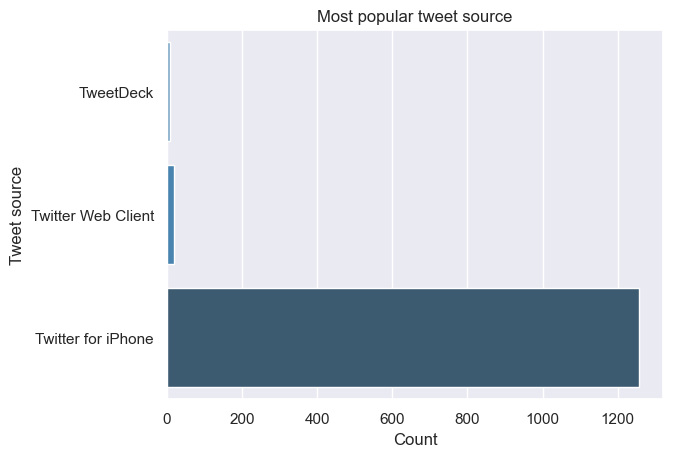

In [139]:
# Plotting a bar graph to show the most popular tweet source
data = df_master.groupby('source').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel= 'Tweet source', title='Most popular tweet source')
plt.show()


 `Twitter for iPhone` is the highest source of tweets from the data frame

#### 2. Most liked tweets by dog stage


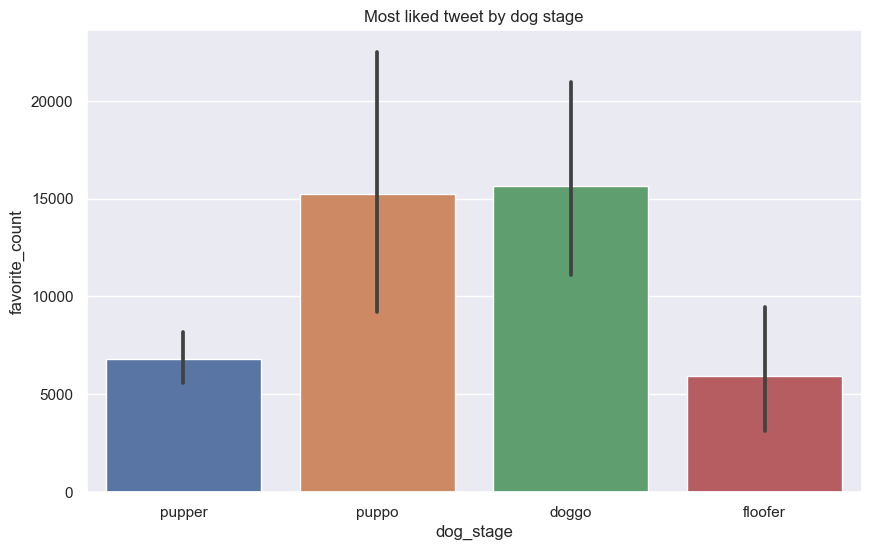

In [140]:
# show favourite count by month 
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'dog_stage' , y='favorite_count', data = df_master)
ax.set_title('Most liked tweet by dog stage')
plt.show()

Dogs in the Doggo has the most liked tweets in the data set

#### 3. Top 12 used Dog names

In [141]:
# getting the top 12 most used dog names
df_master.name.value_counts().head(12)

None       358
Oliver       8
Winston      7
Tucker       7
Penny        6
Lucy         6
Cooper       6
Sadie        5
Bailey       5
Lola         5
Bella        5
Toby         5
Name: name, dtype: int64

There were more names not provided than other names, Oliver was the most popular name from the names provided.

#### 4. Most popular dog stage 


In [142]:
# Showing the value count for each dog stage
dog_stage_count = df_master.dog_stage.value_counts()
dog_stage_count

pupper     141
doggo       42
puppo       15
floofer      4
Name: dog_stage, dtype: int64

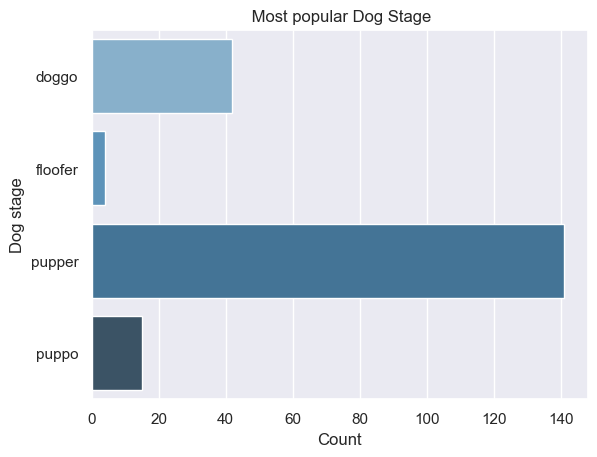

In [143]:
# Plotting a bar graph of the most popular dog stage

data = df_master.groupby('dog_stage').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel="Count", ylabel="Dog stage", title=" Most popular Dog Stage")
plt.show()

Pupper is the most popualr dog stage as it has the highest count in the data frame.

#### 5. Relationship between retweets count and favorites count

<Figure size 3000x3000 with 0 Axes>

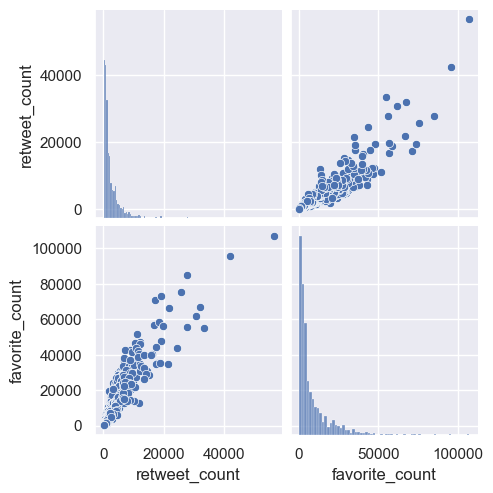

In [144]:
#plotting a chart to show the relationship between RTs counts and favourite count 
plt.figure(figsize=(30, 30));
sns.pairplot(df_master.loc[:, ['retweet_count', 'favorite_count']]);

It looks like theres a positive correlation between retweets count and favorites count.
